In [30]:
import pandas as pd
import numpy as np

In [31]:
ft_data = pd.read_csv('transformed_data.csv')
ft_data = ft_data.drop(['Unnamed: 0'], axis = 1)
ft_data.head(10)

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,...,TropopausePressure_sin_2,TropopausePressure_cos_2,TropopausePressure_sin_3,TropopausePressure_cos_3,CloudFraction_sin_1,CloudFraction_cos_1,CloudFraction_sin_2,CloudFraction_cos_2,CloudFraction_sin_3,CloudFraction_cos_3
0,ID_ENTGC7,2019-01-01,PD01,45.601585,11.903551,0.000000,278.38,0.230527,0.559117,0.000024,...,-0.930569,-0.366117,0.221302,0.975205,0.038595,0.999255,0.077133,0.997021,0.115556,0.993301
1,ID_8JCCXC,2019-01-01,PD04,45.371005,11.840830,3.047342,278.38,-0.074006,0.869309,0.000024,...,-0.953129,-0.302565,0.318669,0.947866,0.059986,0.998199,0.119756,0.992803,0.179095,0.983832
2,ID_V3136Z,2019-01-01,RO01,45.045825,12.060869,0.000000,278.38,0.024470,0.674160,0.000024,...,-0.818366,-0.574698,-0.132563,0.991175,0.046531,0.998917,0.092962,0.995670,0.139191,0.990266
3,ID_KRVZDJ,2019-01-01,RO02,45.104075,11.553241,1.200467,278.38,-0.010442,0.920054,0.000024,...,-0.930999,-0.365021,0.223023,0.974813,0.063483,0.997983,0.126710,0.991940,0.189426,0.981895
4,ID_PR351A,2019-01-01,RO03,45.038758,11.790152,1.274564,278.38,-0.176178,0.747464,0.000024,...,-0.870264,-0.492585,0.012811,0.999918,0.051586,0.998669,0.103036,0.994678,0.154210,0.988038
5,ID_4XN0K8,2019-01-01,TV01,45.889734,12.307124,0.000000,278.38,-0.366831,0.324392,0.000023,...,-0.557004,-0.830510,-0.632390,0.774650,0.022396,0.999749,0.044781,0.998997,0.067143,0.997743
6,ID_O0RJKX,2019-01-01,TV02,45.671721,12.237807,0.000000,278.38,0.188599,0.818422,0.000024,...,-0.790441,-0.612538,-0.202102,0.979365,0.056479,0.998404,0.112777,0.993620,0.168715,0.985665
7,ID_1APJEY,2019-01-01,VE01,45.629092,12.590682,0.000000,278.38,0.507837,0.926018,0.000024,...,-0.714131,-0.700012,-0.368805,0.929507,0.063894,0.997957,0.127527,0.991835,0.190640,0.981660
8,ID_4B1H1U,2019-01-01,VE02,45.499618,12.261249,0.000000,278.38,0.087363,0.835097,0.000024,...,-0.860716,-0.509086,-0.015785,0.999875,0.057628,0.998338,0.115065,0.993358,0.172119,0.985076
9,ID_3JD1GC,2019-01-01,VE03,45.428424,12.312930,0.650355,278.38,0.208678,0.812696,0.000024,...,-0.831140,-0.556064,-0.098904,0.995097,0.056084,0.998426,0.111991,0.993709,0.167546,0.985864


In [32]:
ft_data = ft_data.drop(['Date', 'ID', 'ID_Zindi'], axis = 1)

In [33]:
X = ft_data.drop(['GT_NO2'], axis = 1)
y = ft_data['GT_NO2']

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [73]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [74]:
y_pred = xgb_model.predict(X_test)

In [75]:
y_pred = np.round(y_pred, decimals=3)

In [76]:
y_pred

array([17.812, 33.894, 25.738, ..., 13.387, 18.296, 32.616], dtype=float32)

In [77]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, y_pred)

8.054552640893323

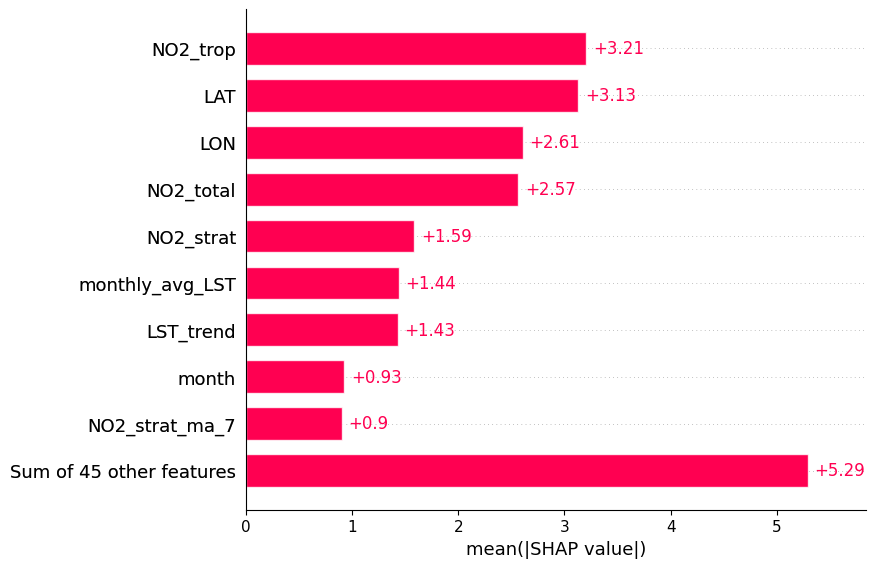

In [78]:
import shap

# Assuming xgb_model is already trained and X_test is your test dataset
explainer = shap.TreeExplainer(xgb_model)

# Get the shap values
shap_values = explainer(X_test)

# Plot a summary bar plot of feature importance
shap.plots.bar(shap_values)

In [79]:
ft_data_test = pd.read_csv('transformed_data_test.csv')
ft_data_test = ft_data_test.drop(['Unnamed: 0'], axis = 1)
ft_data_test.head(10)

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,...,TropopausePressure_sin_2,TropopausePressure_cos_2,TropopausePressure_sin_3,TropopausePressure_cos_3,CloudFraction_sin_1,CloudFraction_cos_1,CloudFraction_sin_2,CloudFraction_cos_2,CloudFraction_sin_3,CloudFraction_cos_3
0,ID_2MYNQS,2019-01-01,PD03,45.289376,11.642394,3.277529,282.98,-0.313361,0.771456,0.000024,...,-0.909136,-0.416499,0.140545,0.990074,0.053241,0.998582,0.106331,0.994331,0.159119,0.987259
1,ID_P4U5WU,2019-01-01,TV03,45.836941,12.510362,0.000000,282.98,-0.229512,0.398208,0.000023,...,-0.665595,-0.746314,-0.460325,0.887751,0.027491,0.999622,0.054962,0.998488,0.082391,0.996600
2,ID_U4KWPK,2019-01-01,X5561,45.582894,8.842165,0.000000,282.98,-0.470822,0.153694,0.000023,...,-0.267686,-0.963506,-0.918516,0.395384,0.010612,0.999944,0.021222,0.999775,0.031831,0.999493
3,ID_QGSNTZ,2019-01-01,X5953,45.131947,10.015742,1.928031,282.98,0.132952,0.756917,0.000024,...,-0.976293,-0.216454,0.442268,0.896883,0.052238,0.998635,0.104334,0.994542,0.156145,0.987734
4,ID_GHSZ6K,2019-01-01,X6701,45.186329,9.146666,0.000000,282.98,-0.198272,0.678858,0.000023,...,-0.931505,-0.363729,0.225051,0.974347,0.046855,0.998902,0.093608,0.995609,0.140154,0.990130
5,ID_NKPFFW,2019-01-01,X6877,45.151743,10.781408,4.023135,282.98,0.044013,0.891932,0.000024,...,-0.939488,-0.342582,0.257952,0.966158,0.061545,0.998104,0.122857,0.992424,0.183704,0.982982
6,ID_Z9ICW9,2019-02-01,PD03,45.289376,11.642394,0.000000,281.08,-0.177263,0.166926,0.000033,...,0.942838,-0.333251,0.272292,-0.962215,0.011525,0.999934,0.023049,0.999734,0.034570,0.999402
7,ID_H2YFI6,2019-02-01,TV03,45.836941,12.510362,0.000000,282.36,-0.606076,0.045993,0.000032,...,-0.517341,0.855779,-0.728145,0.685423,0.003176,0.999995,0.006351,0.999980,0.009527,0.999955
8,ID_RMBWWV,2019-02-01,X5561,45.582894,8.842165,0.000000,283.60,-0.750231,0.000000,0.000032,...,-0.965401,0.260769,-0.925034,-0.379884,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
9,ID_8JASJD,2019-02-01,X5953,45.131947,10.015742,0.000000,283.60,-0.626818,0.391763,0.000034,...,0.476436,-0.879209,-0.735159,-0.677895,0.027046,0.999634,0.054073,0.998537,0.081060,0.996709


In [80]:
test_x = ft_data_test.drop(['Date', 'ID', 'ID_Zindi'], axis = 1)

In [81]:
test_predictions = xgb_model.predict(test_x)

In [82]:
submission = pd.DataFrame({
    'ID_Zindi': ft_data_test['ID_Zindi'],
    'GT_NO2_Predicted': test_predictions
})

In [83]:
submission

,ID_Zindi,GT_NO2_Predicted
0,ID_2MYNQS,31.821394
1,ID_P4U5WU,39.449783
2,ID_U4KWPK,39.560307
3,ID_QGSNTZ,27.452126
4,ID_GHSZ6K,31.846895
...,...,...
6571,ID_GUSXU9,33.428856
6572,ID_GMVEG1,38.807430
6573,ID_GD6HNP,28.206854
6574,ID_J7YW1Y,44.043659


In [84]:
submission.to_csv('predictions.csv', index=False)